In [159]:
#!/usr/bin/env python3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys
from scipy.special import stdtrit
from math import isnan

# Import the data
if sys.platform == 'darwin':
    df = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/code/rundata/run_data.csv")
if sys.platform == 'win32':
    df = pd.read_csv("D:/OneDrive/Research/2021_Market_Ecology/evology/evology/code/rundata/run_data.csv")

0.0070711036736065165
201600
0.0070711036736065165
nan


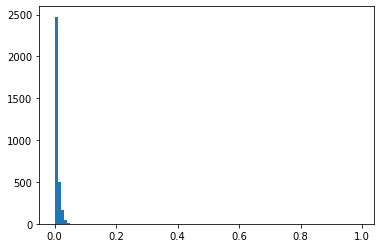

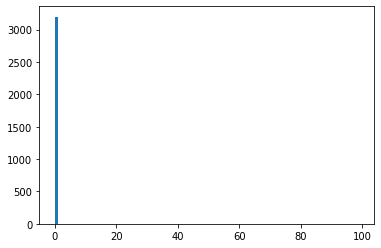

In [160]:
pct_changes = list(df['nav_pct'])
# print(pct_changes)
print(np.nanmean(pct_changes))
print(len(pct_changes))
for i in range(len(pct_changes)):
    if pct_changes[i] > 100:
        pct_changes[i] = np.nan
print(np.nanmean(pct_changes))
print(max(pct_changes))
bins = range(0,100)
bins = [item / 100 for item in bins]
plt.hist(pct_changes, bins = bins)
plt.show()
plt.hist(pct_changes, bins = range(0,100))
plt.show()


0.0070711036736065165
201600
0.0070711036736065165
0.0641735515539296


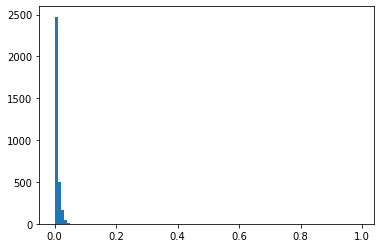

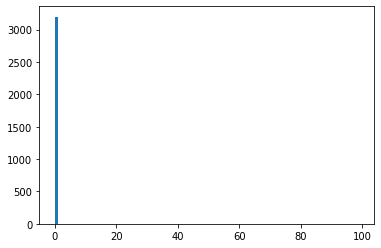

In [161]:
pct_changes = list(df['nav_pct'])
# print(pct_changes)
print(np.nanmean(pct_changes))
print(len(pct_changes))
for i in range(len(pct_changes)):
    if pct_changes[i] > 10:
        pct_changes[i] = np.nan
print(np.nanmean(pct_changes))
print(np.nanmax(pct_changes))
bins = range(0,100)
bins = [item / 100 for item in bins]
plt.hist(pct_changes, bins = bins)
plt.show()
plt.hist(pct_changes, bins = range(0,100))
plt.show()

short volume ratio
1.1573498590246873
Short ratio (numb short sold / avg rolling volume)
2386653.456985175
7.566605100177948
Short % of float 
1.1440284356704054


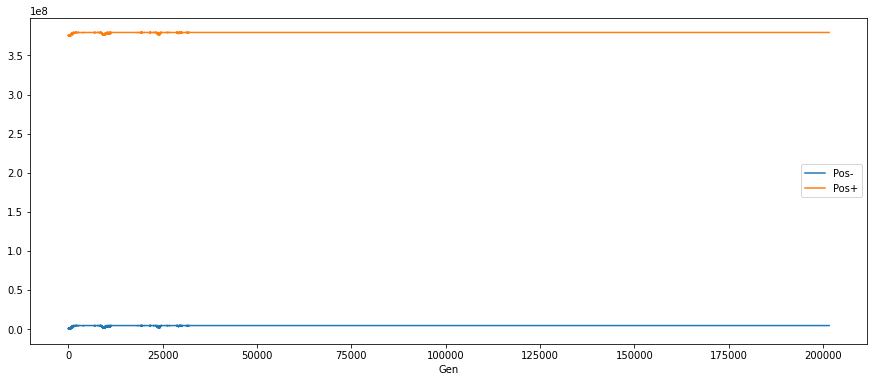

In [162]:
# Calibration of short volume ratio

print('short volume ratio')
asset_supply = df["Pos+"].mean() - df["Pos-"].mean()
# Average short volume ratio in our ABM:
print(100 * df["Pos-"].mean() / asset_supply)

print('Short ratio (numb short sold / avg rolling volume)')
# Short interest ratio as days to cover
df["short_ratio"] = df["Pos-"] / (df["Volume"] + 1)
print(df["short_ratio"].mean())
print(df["Pos-"].mean() / df["Volume"].mean())

# Short interest as percentage of float (outstanding)
print('Short % of float ')
df["FloatPer"] = df["Pos-"] / df["Pos+"]
# df["FloatPer"] = df["Pos-"] / asset_supply
print(100 * df["FloatPer"].mean())

df.plot(x="Gen", y = ["Pos-", "Pos+"],
        kind="line", figsize=(15, 6))
plt.show()

# the short volume ratio and short percentage of float are consistent after limiting max short size
# However, the short ratio (to volumne) is higher. It mostly means that the short positions are liquidated much faster in our model. 
# But siunce they still occupy the same relative amount to outstanding shares, it just means that they are closed/opened at higher frequencies
# than in regular data. Which makes sense because not all happens at a daily scale, and there are some funds who maintain short positions
# over long time horizons.

In [163]:
print(df['WShare_VI'].iloc[-1])
print(df['WShare_NT'].iloc[-1])
print(df['WShare_TF'].iloc[-1])

38.50852281524531
40.70052753185019
20.7909496529045


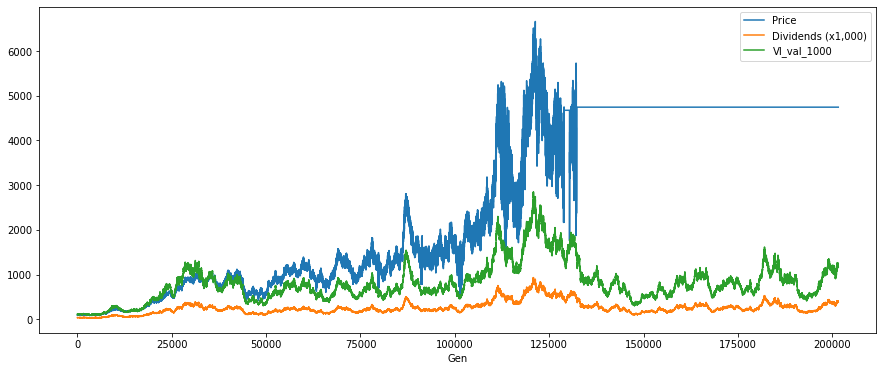

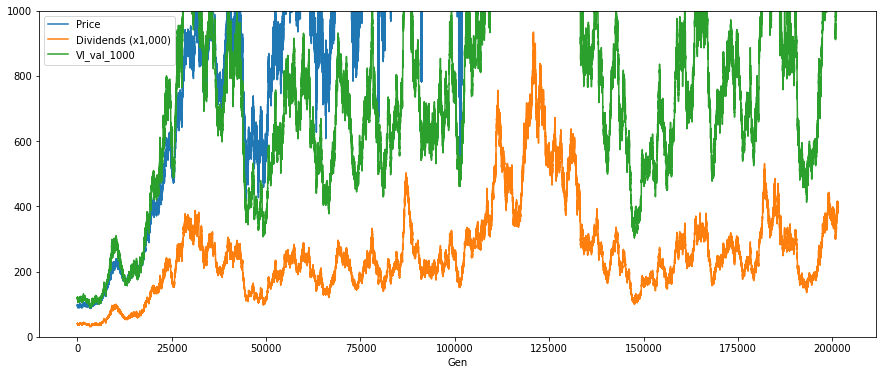

In [164]:
df['Dividends (x1,000)'] = 10000 * df['Dividends']
df['VI_val_1000'] = df['VI_val']
df.plot(x="Gen", y = ['Price', 'Dividends (x1,000)', 'VI_val_1000'],
        kind="line", figsize=(15, 6))
plt.show()

df['Dividends (x1,000)'] = 10000 * df['Dividends']
df['VI_val_1000'] = df['VI_val']
df.plot(x="Gen", y = ['Price', 'Dividends (x1,000)', 'VI_val_1000'],
        kind="line", figsize=(15, 6), ylim = (0,1_000))
plt.show()



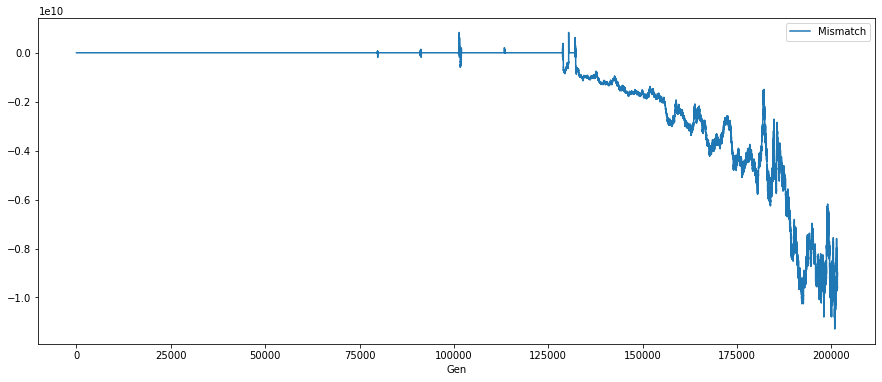

In [165]:

df.plot(x="Gen", y = ["Mismatch"],
        kind="line", figsize=(15, 6))
plt.show()


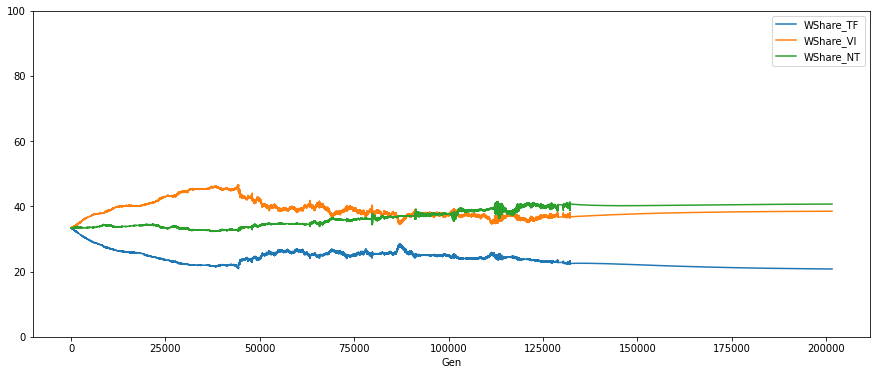

In [166]:

df.plot(x="Gen", y = ["WShare_TF", "WShare_VI", "WShare_NT"],
        kind="line", figsize=(15, 6), ylim=(0,100))
# plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/share_evo.png', dpi = 300)
plt.show()


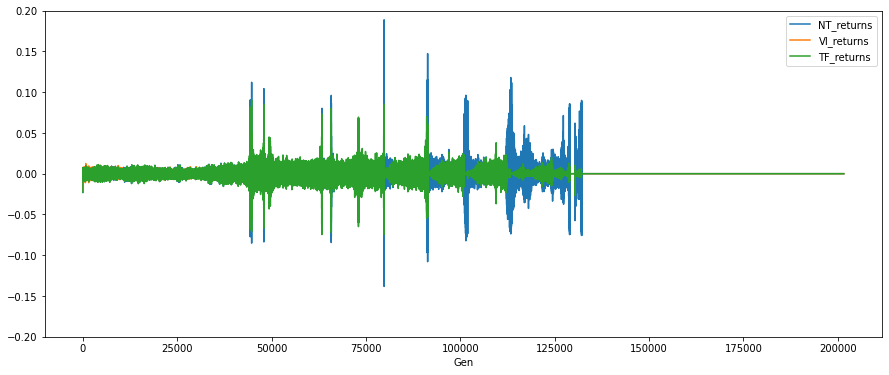

In [167]:

df.plot(x="Gen", y = ["NT_returns", "VI_returns", "TF_returns"],
        kind="line", figsize=(15, 6), ylim=(-0.2,0.2))
plt.show()

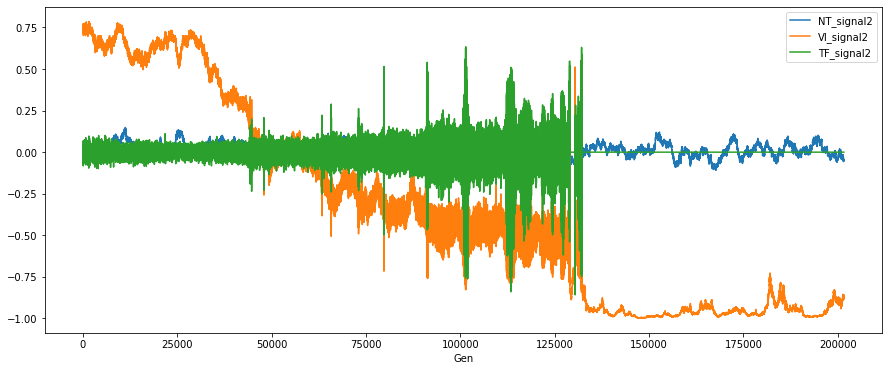

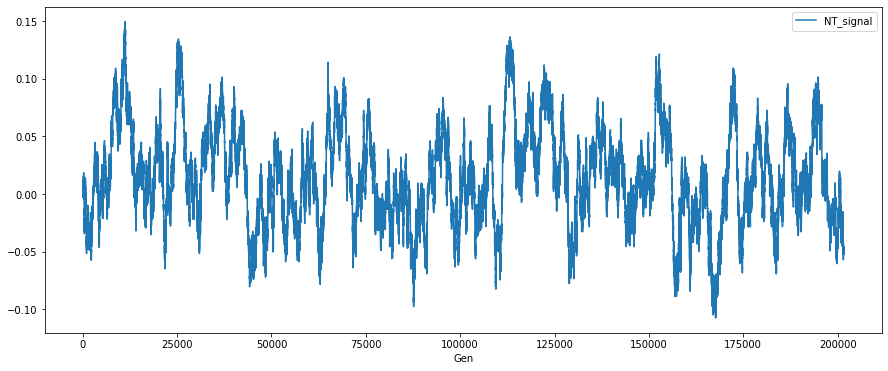

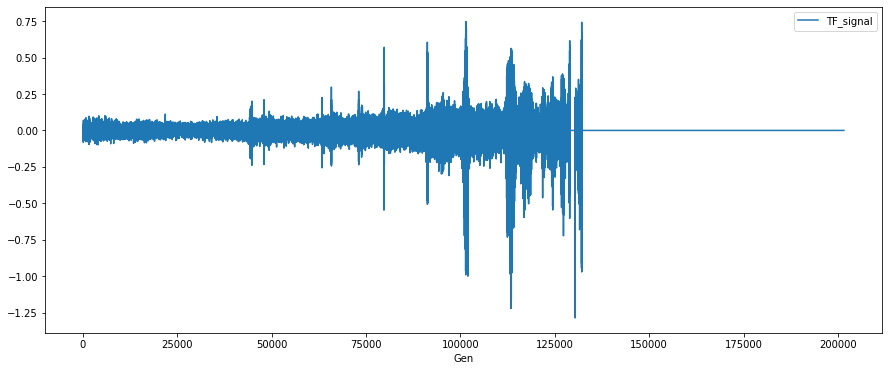

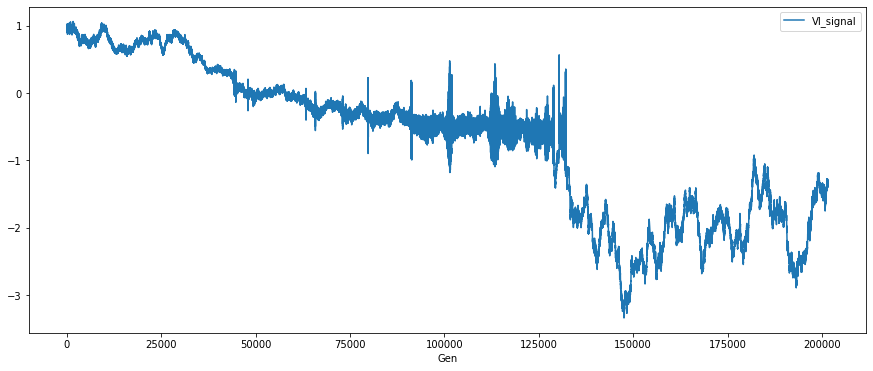

In [168]:
df['NT_signal2'] = np.tanh(df['NT_signal'])
df['VI_signal2'] = np.tanh(df['VI_signal'])
df['TF_signal2'] = np.tanh(df['TF_signal'])

df.plot(x="Gen", y=["NT_signal2", "VI_signal2", "TF_signal2"],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y=["NT_signal"],
        kind="line", figsize=(15, 6))
plt.show()
df.plot(x="Gen", y=["TF_signal"],
        kind="line", figsize=(15, 6))
plt.show()
df.plot(x="Gen", y=["VI_signal"],
        kind="line", figsize=(15, 6))
plt.show()


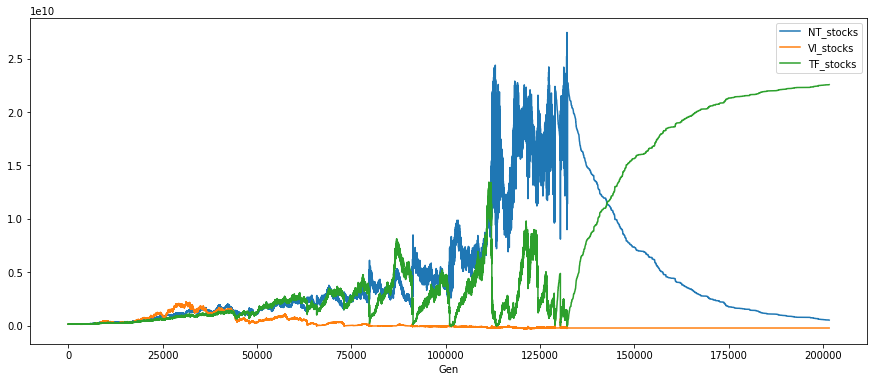

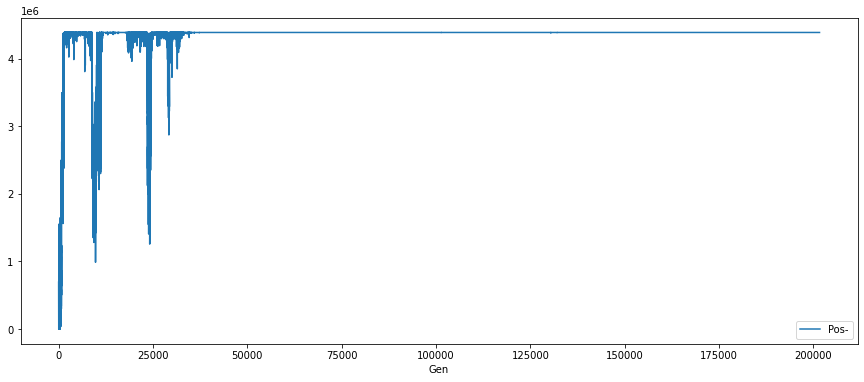

In [169]:
df.plot(x="Gen", y = ["NT_stocks", "VI_stocks", "TF_stocks"],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y = ["Pos-"],
        kind="line", figsize=(15, 6))
plt.show()


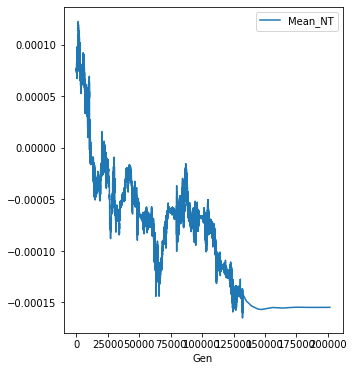

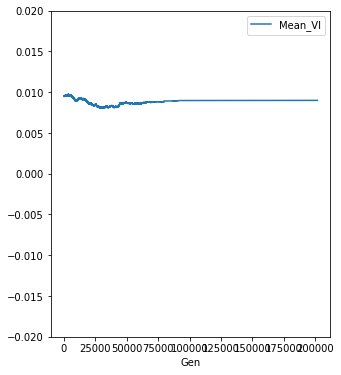

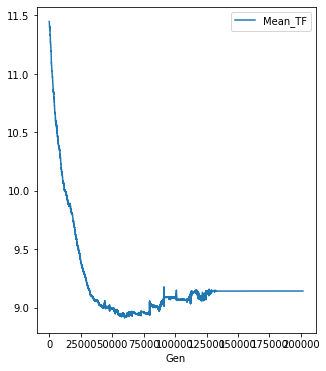

In [170]:

df.plot(x="Gen", y = ["Mean_NT"],
        kind="line", figsize=(5, 6))
plt.show()
df.plot(x="Gen", y = ["Mean_VI"],
        kind="line", figsize=(5, 6), ylim=(-0.02, 0.02))
plt.show()
df.plot(x="Gen", y = ["Mean_TF"],
        kind="line", figsize=(5, 6))
plt.show()

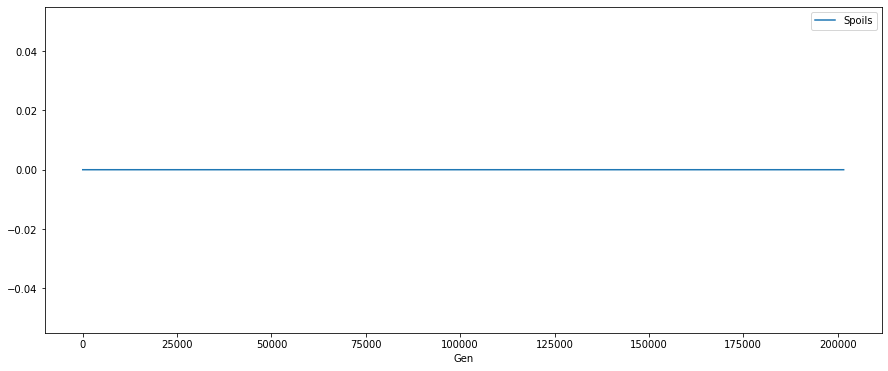

In [171]:
df.plot(x="Gen", y = ["Spoils"],
        kind="line", figsize=(15, 6))
plt.show()


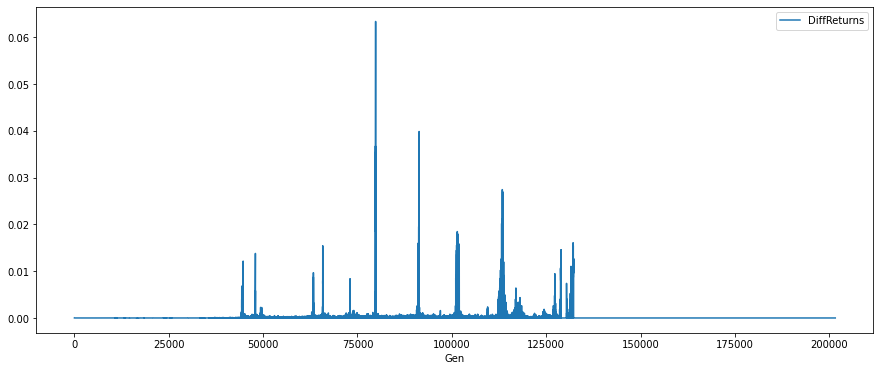

In [172]:
df.plot(x="Gen", y = ["DiffReturns"],
        kind="line", figsize=(15, 6))
plt.show()

In [173]:
if df['AvgT'].sum() != 0:

        print(df['AvgT'].mean())

        df.plot(x="Gen", y = ["AvgT", "HighestT","AvgAbsT"],
                kind="line", figsize=(15, 6))
        plt.show()


In [174]:
SharpeNT = np.nanmean(df['NT_returns']) / np.nanstd(df['NT_returns'])
SharpeVI = np.nanmean(df['VI_returns']) / np.nanstd(df['VI_returns'])
SharpeTF = np.nanmean(df['TF_returns']) / np.nanstd(df['TF_returns'])

print('Daily Sharpe ratios ')
print(SharpeNT, SharpeVI, SharpeTF)
print('Daily mean returns 2 ')
print([np.nanmean(df['NT_returns']), np.nanmean(df['VI_returns']), np.nanmean(df['TF_returns'])])

DiffSharpe = (SharpeNT - SharpeVI) ** 2  + (SharpeNT - SharpeTF) ** 2 + (SharpeVI - SharpeTF) ** 2
print(DiffSharpe)



Daily Sharpe ratios 
0.01211219645266703 0.032973045587033026 0.011036515099288062
Daily mean returns 2 
[0.00010350161594834323, 4.701782449511748e-05, 6.055007437432374e-05]
0.0009175434868205502


0.0


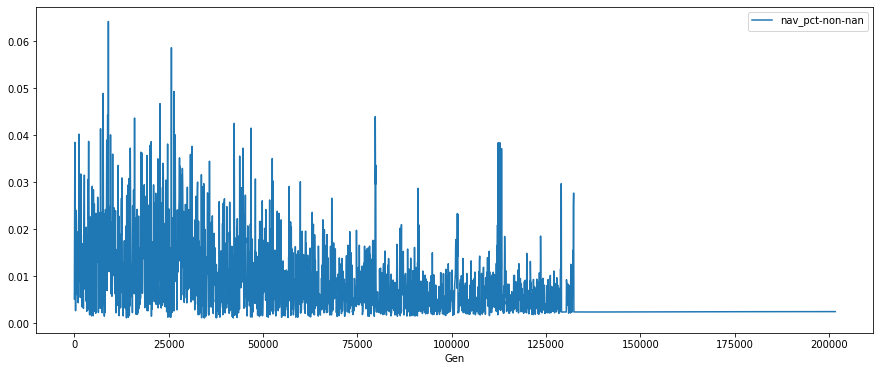

In [175]:
print(df['Rep'].sum())
if df['Rep'].sum() != 0:
        df.plot(x="Gen", y = ['Rep'],
                kind="line", figsize=(15, 6))
        plt.show()

df2 = pd.DataFrame()
df2['nav_pct-non-nan'] = df['nav_pct'].dropna()
df2['nav_pct-non-nan'] = df2['nav_pct-non-nan'][df2['nav_pct-non-nan'] <1000]
df2['Gen'] = df['Gen']
df2.plot(x="Gen", y = ['nav_pct-non-nan'],
                kind="line", figsize=(15, 6))
plt.show()

In [176]:
if df['Rep'].sum() != 0:
        df['Rep10'] = 2 * df['Rep']
        df.plot(x="Gen", y = ['Rep10','WShare_TF'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_VI'],
        kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_NT'],
        kind="line", figsize=(15, 6))
        plt.show()

In [177]:
if df['CountSelected'].sum() != 0 or df['CountMutated'].sum() != 0 or df['CountCrossed'].sum() != 0:

        df.plot(x="Gen", y = ["CountSelected", 'CountMutated', 'CountCrossed'],
                kind="line", figsize=(15, 6))
        plt.show()
        print('Strategy outflows')
        df.plot(x="Gen", y = ["FromNT", 'FromVI', 'FromTF'],
                kind="line", figsize=(15, 6))
        plt.show()
        print('Strategy inflows')
        df.plot(x="Gen", y = ["TowardsNT", 'TowardsVI', 'TowardsTF'],
                kind="line", figsize=(15, 6))
        plt.show()

In [178]:
if df['Spoils'].sum() != 0:
        df.plot(x="Gen", y = ['Spoils'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['PerSpoils'],
                kind="line", figsize=(15, 6))
        plt.show()

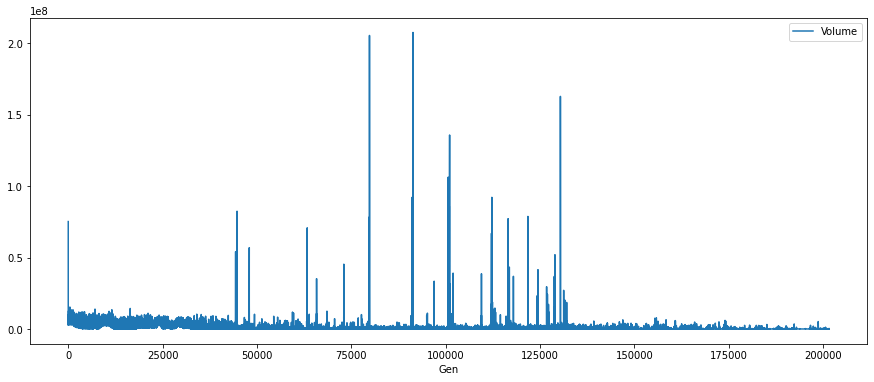

0         7.523396e+07
1         1.967612e+07
2         5.236996e+06
3         2.573563e+06
4         2.991544e+06
              ...     
201595    0.000000e+00
201596    0.000000e+00
201597    0.000000e+00
201598    0.000000e+00
201599    0.000000e+00
Name: Volume, Length: 201600, dtype: float64


In [179]:
df.plot(x="Gen", y = ['Volume'],
        kind="line", figsize=(15, 6))
plt.show()

print(df['Volume'])

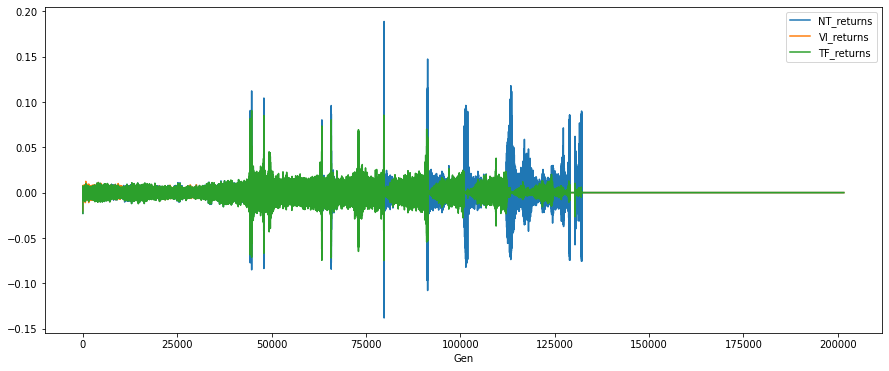

In [180]:
df.plot(x="Gen", y = ["NT_returns", "VI_returns", "TF_returns"],
        kind="line", figsize=(15, 6))
plt.show()

# df['DiffReturns'] = (df['NT_returns'] - df['VI_returns']) ** 2 + (df['NT_returns'] - df['TF_returns']) ** 2 + (df['VI_returns'] - df['TF_returns']) ** 2



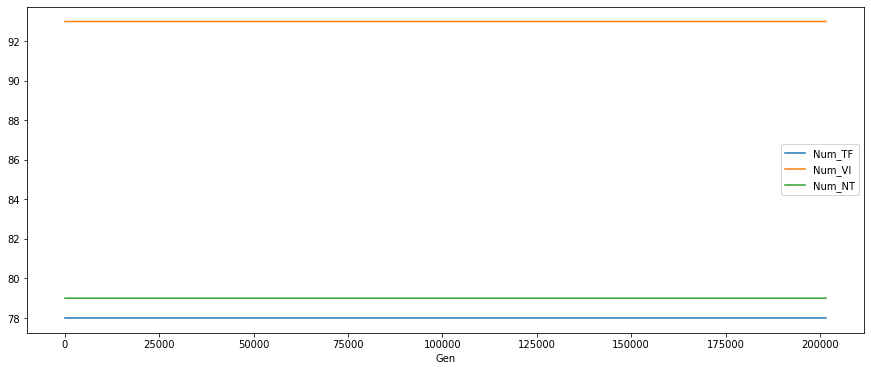

In [181]:
# Basic plots

df.plot(x="Gen", y = ["Num_TF", "Num_VI", "Num_NT"],
        kind="line", figsize=(15, 6))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/num_evo.png', dpi = 300)
plt.show()

Average wealth per fund in the strategy


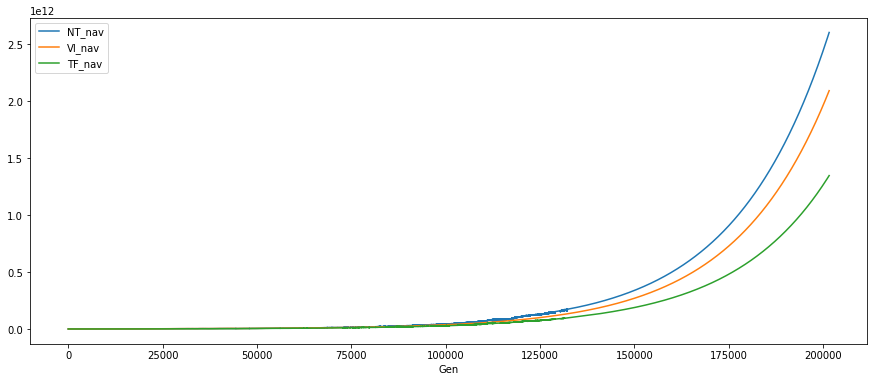

In [182]:
''' NAV '''
print('Average wealth per fund in the strategy')
df.plot(x="Gen", y = ["NT_nav", "VI_nav", "TF_nav"],
        kind="line", figsize=(15, 6))
plt.show()
